In [1]:
#     Medical Cost Insurance
#     This is an exercise for Regression problems.
#     I'm going to apply:
#         -Multiple Linear Regression
#         -SVR
#         -Decision Tree Regression
#         -Random Forest Regression

#     to see which one has the best preformance
#     obviously this dataset is so small in features and isn't a reliable one but i think it's a good one to start and see which Reg solution will better answer

#     FT: I'm a beginner in ML and any sugesstions would be appritiated :)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset = pd.read_csv('Insurance.csv')
X_pd = dataset.iloc[:,:-1]
y_pd = dataset.iloc[:,-1]
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# Preprocessing
# sex, smoker and region need to change to dummy variables
dummy_sex = pd.get_dummies(X_pd.iloc[:,1])
dummy_smoker = pd.get_dummies(X_pd.iloc[:,4])
dummy_region = pd.get_dummies(X_pd.iloc[:,5])

In [5]:
dummy_region = dummy_region.drop(columns='southwest')
dummy_sex = dummy_sex.drop(columns='male')
dummy_smoker = dummy_smoker.drop(columns='no')

In [6]:
X_pd = X_pd.drop(columns=['sex','region','smoker'])

In [7]:
dfs = [X_pd,dummy_region,dummy_sex,dummy_smoker]

In [8]:
X_pd = pd.concat(dfs,axis=1)
X_pd

,age,bmi,children,northeast,northwest,southeast,female,yes
0,19,27.900,0,0,0,0,1,1
1,18,33.770,1,0,0,1,0,0
2,28,33.000,3,0,0,1,0,0
3,33,22.705,0,0,1,0,0,0
4,32,28.880,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,0,0,0
1334,18,31.920,0,1,0,0,1,0
1335,18,36.850,0,0,0,1,1,0
1336,21,25.800,0,0,0,0,1,0


In [9]:
# By now we fixed the dummy variables and avoided the dummy variable trap
# now im going to plot some of the Independent Vars with Dependent var to have a vision of what we are looking at

Text(0, 0.5, 'Charges')

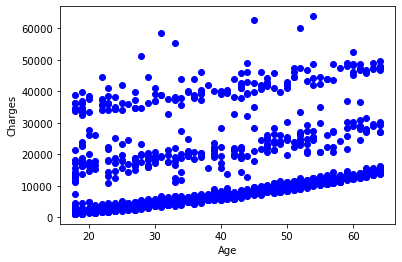

In [12]:
plt.scatter(X_pd.iloc[:,0],y_pd,color='blue')
plt.xlabel('Age')
plt.ylabel('Charges')

Text(0, 0.5, 'Charges')

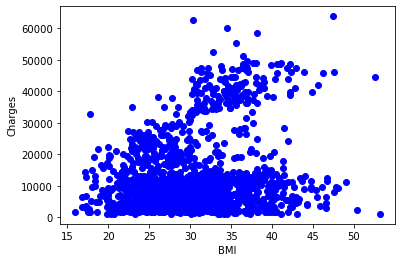

In [13]:
plt.scatter(X_pd.iloc[:,1],y_pd,color='blue')
plt.xlabel('BMI')
plt.ylabel('Charges')

Text(0, 0.5, 'Charges')

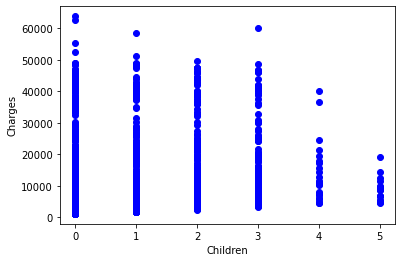

In [14]:
plt.scatter(X_pd.iloc[:,2],y_pd,color='blue')
plt.xlabel('Children')
plt.ylabel('Charges')

In [15]:
# I think its enough for ploting!(didn't expect that to be this complicated!)
# now im gonna apply the models:

In [16]:
# Multiple Linear Regression

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pd,y_pd,test_size=0.2,random_state = 0)

In [54]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [55]:
regressor.score(X_test,y_test)

0.7999876970680433

In [68]:
#Decision Tree Refression

In [83]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=8)
regressor.fit(X_train,y_train)

DecisionTreeRegressor(random_state=8)

In [84]:
regressor.score(X_test,y_test)

0.7219207484956605

In [85]:
# Random Forest Regression

In [94]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100,random_state=0)
regressor.fit(X_train,y_train)

RandomForestRegressor(random_state=0)

In [95]:
regressor.score(X_train,y_train)

0.9737175511120907

In [96]:
# Support Vector Regressor
# For SVR i apply Feature Scaling

In [113]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train_svr = sc_X.fit_transform(X_train.iloc[:].values.reshape(len(X_train),8))
X_test_svr = sc_X.fit_transform(X_test.iloc[:].values.reshape(len(X_test),8))
y_train_svr = sc_y.fit_transform(y_train.iloc[:].values.reshape(len(y_train),1))
y_test_svr = sc_y.fit_transform(y_test.iloc[:].values.reshape(len(y_test),1))

In [115]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X_train_svr,y_train_svr)

SVR()

In [116]:
regressor.score(X_test_svr,y_test_svr)

0.890945949214549